In [2]:
from pathfiding.a_star import astar_path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

%matplotlib inline

## Create a Map

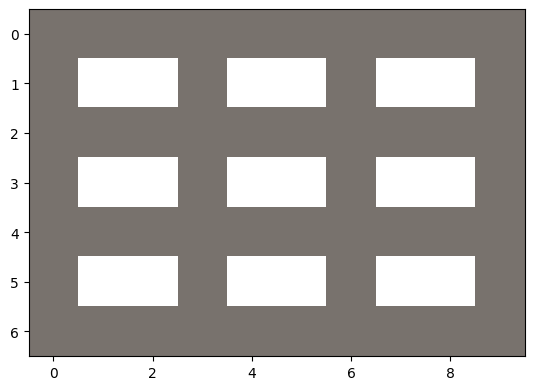

In [7]:
# obstacle_name: [(upper_left_corner), (upper_right_corner), (lower_left_corner), (lower_right_corner)]
aisle_info = {
  "obstacle1": [(1,1),(2,1),(1,1),(2,1)],
  "obstacle2": [(1,3),(2,3),(1,3),(2,3)],
  "obstacle3": [(1,5),(2,5),(1,5),(2,5)],
  "obstacle4": [(4,1),(5,1),(4,1),(5,1)],
  "obstacle5": [(4,3),(5,3),(4,3),(5,3)],
  "obstacle6": [(4,5),(5,5),(4,5),(5,5)],
  "obstacle7": [(7,1),(8,1),(7,1),(8,1)],
  "obstacle8": [(7,3),(8,3),(7,3),(8,3)],
  "obstacle9": [(7,5),(8,5),(7,5),(8,5)],
}

map_size = (7,10)
map_gen = np.ones(map_size)

for aisle_name, aisle_coords in aisle_info.items():
    y_coords, x_coords = zip(*aisle_coords)
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)
    map_gen[x_min:x_max+1, y_min:y_max+1] = np.inf

# colors = ["#5FE849", "#B2AEAA"]
colors = ["#78726d", "#B2AEAA"]
# colormap bases on the COLORS
cmap = LinearSegmentedColormap.from_list(
    "map_color", colors=colors, N=len(colors))

fig, ax = plt.subplots()
ax.imshow(map_gen, cmap=cmap)

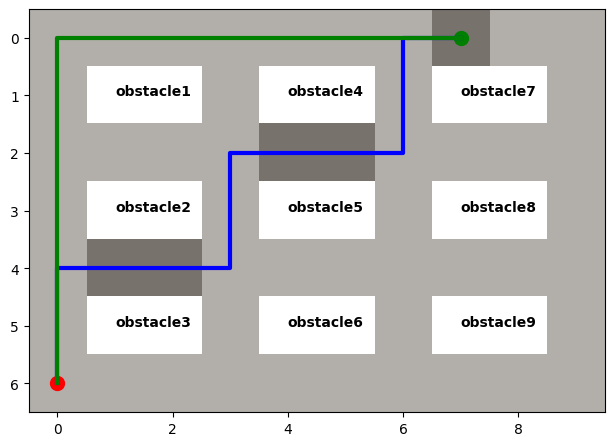

In [8]:
# Define the grid and the costs

## Map selection
WEIGHTS = True

## grid includes 2 maps, each being as an nd.array
## grid[0] is map with no costs assigned
## grid[1] is map with costs
## In the map, each entry represents the costs of stepping into it. eg. np.inf meaning an obstacle

grid = {
  0:map_gen,
  1:np.array([
    [3, 3, 3, 3, 3, 3, 3, 2.8, 3, 3],
    [3, np.inf, np.inf, 3, np.inf, np.inf, 3, np.inf, np.inf, 3],
    [3, 3, 3, 3, 2.8, 2.8, 3, 3, 3, 3],
    [3, np.inf, np.inf, 3, np.inf, np.inf, 3, np.inf, np.inf, 3],
    [3, 2.8, 2.8, 3, 3, 3, 3, 3, 3, 3],
    [3, np.inf, np.inf, 3, np.inf, np.inf, 3, np.inf, np.inf, 3],
    [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
  ])
}

aisle_label = {k: v[0] for k, v in aisle_info.items()}

store_map = grid[WEIGHTS]

# Define the start and goal nodes
start = (6, 0)
goal = (0, 7)

# Run the A* search algorithm
path = astar_path(store_map, start, goal)
path = [p for p in path if p is not None]

path0 = astar_path(grid[False], start, goal)
path0 = [p for p in path0 if p is not None]

# colors = ["#5FE849", "#B2AEAA"]
colors = ["#78726d", "#B2AEAA"]
# colormap bases on the COLORS
cmap = LinearSegmentedColormap.from_list(
    "map_color", colors=colors, N=len(colors))

fig, ax = plt.subplots()
# ax.imshow(store_map, cmap="Blues")
ax.imshow(store_map, cmap=cmap)

# Plot the aisle information
for k, v in aisle_label.items():
  ax.text(x=v[0], y=v[1], s=k, fontweight="bold")

# Plot the start and goal points as red and green dots
ax.plot(start[1], start[0], 'ro', markersize=10)
ax.plot(goal[1], goal[0], 'go', markersize=10)

# Plot the path as a blue line
path_xs, path_ys = zip(*path)
ax.plot(path_ys, path_xs, 'b', linewidth=3)

# Plot the path with no weights as a green line
path_xs, path_ys = zip(*path0)
ax.plot(path_ys, path_xs, 'g', linewidth=3)

# Adjust the plot margins
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

# Show the plot
plt.show()